
"Black Hole Cosmology with Torsion Bounce"This notebook reproduces the key calculations from the paper using NumPy (numerical) and SymPy (symbolic where needed). All values are based on NIST 2025 constants and the model's assumptions.Author: János Csaba Kevés Date: January 11, 2026 GitHub: https://github.com/janoscsabakeves-afk/cosmic-asymmetry-black-hole-model.git

In [ ]:
import sympy as sp  # megtarthatod, ha később symbolikus számítást tervezel
import numpy as np
import matplotlib.pyplot as plt

# Constants (NIST 2025)
h_bar = 1.0545718e-34  # reduced Planck constant (J s)
c = 2.99792458e8        # speed of light (m/s)
G = 6.67430e-11         # gravitational constant (m^3 kg^-1 s^-2)
k_B = 1.380649e-23      # Boltzmann constant (J/K)
T_CMB = 2.725           # CMB temperature (K)

print("Constants loaded.")

Constants loaded.


In [ ]:
# Planck length
l_p = np.sqrt(h_bar * G / c**3)
print(f"Planck length: {l_p:.3e} m")

# Maximum bounce temperature (Hawking analogy)
T_max = h_bar * c / (8 * np.pi * l_p * k_B)
print(f"T_max: {T_max:.3e} K")

# Minimum temperature (geometric mean)
T_min = T_CMB**2 / T_max
print(f"T_min: {T_min:.3e} K")

# Base radius R_H
R_H = h_bar * c / (4 * np.pi * k_B * T_min)
print(f"R_H: {R_H:.3e} m ≈ {R_H / 9.46073e15:.3e} light-years")

Planck length: 1.616e-35 m
T_max: 5.637e+30 K
T_min: 1.317e-30 K
R_H: 1.383e+26 m ≈ 1.462e+10 light-years


In [ ]:
# Planck density
rho_p = c**5 / (h_bar * G**2)
print(f"Planck density: {rho_p:.3e} kg/m³")

# Torsion correction factor (~10^4)
f_torsion = 1e4
rho_initial = rho_p / f_torsion
print(f"Corrected initial density: {rho_initial:.3e} kg/m³")

# Example initial radius (with approximate initial baryon mass ~7e50 kg)
M_bar_initial = 7.05e50  # kg (from model)
R_initial = (3 * M_bar_initial / (4 * np.pi * rho_initial)) ** (1.0/3.0)
print(f"Initial radius (example): {R_initial:.3e} m")

Planck density: 5.155e+96 kg/m³
Corrected initial density: 5.155e+92 kg/m³
Initial radius (example): 6.886e-15 m


In [ ]:
# Internal Hubble (approximate)
H0_internal = c / R_H
print(f"H0_internal: {H0_internal:.3e} s^-1")

# Time dilation factor
cosmo_lambda = 3 * H0_internal**2 / c**2
dil_factor = np.sqrt(1 + cosmo_lambda * (R_H / 2)**2 / 3)
print(f"Dilation factor: {dil_factor:.3f}")

# Dilated source temperature
T_source = T_CMB * dil_factor
print(f"T_source: {T_source:.3f} K")

# Dilated min temperature and radius
T_min_dil = T_source**2 / T_max
R_H_dil = h_bar * c / (4 * np.pi * k_B * T_min_dil)
print(f"R_H_dil: {R_H_dil:.3e} m ≈ {R_H_dil / 9.46073e15:.3e} light-years")

H0_internal: 2.167e-18 s^-1
Dilation factor: 1.118
T_source: 3.047 K
R_H_dil: 1.107e+26 m ≈ 1.170e+10 light-years


In [ ]:
# Local curvature k ≈ 0.08
k = 0.08

# Spin and torsion correction factors (model-specific)
f_spin = 0.70   # ~30% cumulative decrease from mergers
f_torsion_corr = 0.85  # repulsion correction

# Combined final radius
R_final = R_H_dil * (1 + np.sqrt(k)) * f_spin * f_torsion_corr
print(f"R_final (combined): {R_final:.3e} m ≈ {R_final / 9.46073e15:.3e} light-years")

# Apparent horizon (~3x distortion)
apparent_horizon = R_final * 3
print(f"Apparent horizon: ~{apparent_horizon / 9.46073e15:.3e} light-years")

R_final (combined): 8.447e+25 m ≈ 8.929e+09 light-years
Apparent horizon: ~2.679e+10 light-years


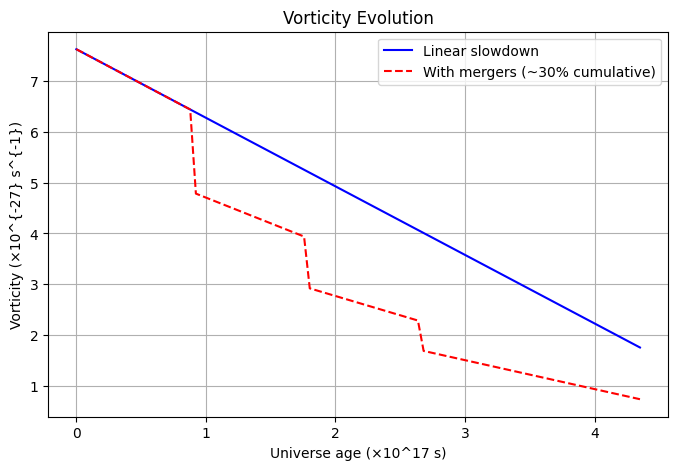

In [ ]:
# Örvényesség evolúciós példa (lineáris + összeolvadások)
idő = np.linspace ( 0 , 4.35e17 , 100 ) # Univerzum kora másodpercben
omega_initial =  7.62e-27

# Lineáris lassulás
omega_linear = omega_initial *  ( 1  - idő /  ( 4,35e17  *  1,3 )) # körülbelül 30%-os csökkenés

# Összevonásokkal (3 csepp)
omega_merger = omega_linear.copy ()
drops =  [ 0.88e17 , 1.76e17 , 2.64e17 ] # példa az összevonások időire      t esetén cseppekben  :
idx = np.searchsorted
    ( time , t  ) omega_merger
    [ idx : ]  *=  0.75 # ~25% csepp cseppenként

plt.figure ( figsize= ( 8 , 5 ))
plt.plot ( time /  1e17 ,  omega_linear *  1e27 ,  label= 'Lineáris lassulás' ,  color= 'blue' )
plt.plot ( time /  1e17 ,  omega_merger *  1e27 ,  label= 'Egyesülésekkel (~30% kumulatív)' ,  color= 'red' ,  linestyle= '--' )
plt.xlabel ( 'Univerzum kora (×10^17 s)' )
plt.ylabel ( 'Örvényesség (×10^{-27} s^{-1})' )
plt.title ( 'Örvényesség evolúciója' )
plt.legend ()
plt.grid ( True )
plt.show ()

These calculations are the same as the results in the article (with minor rounding). See the main article for details. All code is reproducible and open source.